A simple example that walks you through the procedures involved in training a SVM classifier using Scikit-Learn. <br>
<br>
Author: Jiajia Sun at University of Houston, 02/14/2019

# 1. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 2. Create synthetic data

In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

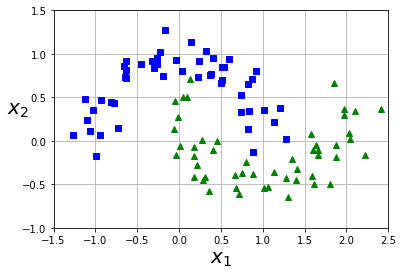

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# 3. Train a SVM classiifer

In [28]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5)
svm_clf.fit(X,y)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# 4. Visualize the classification results

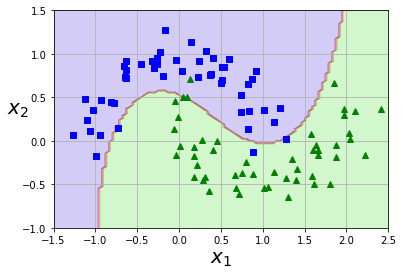

In [29]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()